<a href="https://colab.research.google.com/github/Jeromy0515/Jeromy0515/blob/main/decision_tree/decision_tree5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정 트리(Decision Tree)
- 분류(Classification)와 회귀(Regression) 모두 가능한 지도 학습 모델
- 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습
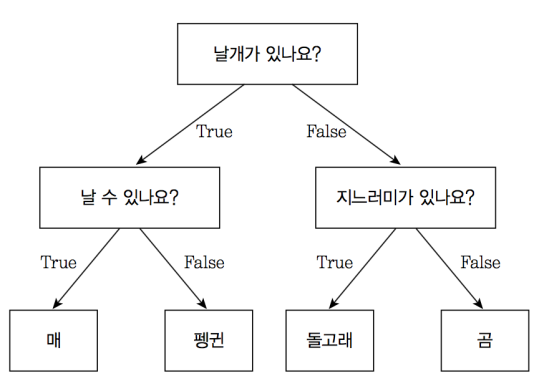
- 데이터를 잘 나눌 수 있는 질문을 찾으면 계속 질문을 추가해서 분류 정확도를 높임
- 사이킷런이 결정 트리 알고리즘을 제공
- 사용법은 동일(fit, score, predict)


In [1]:
import pandas as pd
wine = pd.read_csv('/content/drive/MyDrive/Data/wine.csv')
wine.head()

# alcohol: 알코올 도수
# sugar: 당도
# pH: pH값
# class: 타깃값 (0: 레드와인, 1: 화이트와인)

alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0

In [2]:
# pandas-info() 함수
# 데이터프레임의 각 열의 데이터 타입 확인
# 누락된 데이터가 있는지 확인하는데 유용
wine.info()
# 총 6,497 개의 데이터
# 4개 열 모두 실숫값(float64)
# Non-Null Count: 6,497 (누락된 값 없음)
# Q. 누락된 값이 있는 경우는 어떻게?
# A. 데이터를 버리거나 or 평균값으로 채우거나

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [3]:
# pndas-describe() 함수
# 통계 출력: 평균, 표준편차, 최소, 최대, 중간, 1사분위수, 3사분위수
wine.describe()
# 알코올 도수, 당도, pH 값의 스케일이 다름 -> 특성 표준화 필요

alcohol        sugar           pH        class
count  6497.000000  6497.000000  6497.000000  6497.000000
mean     10.491801     5.443235     3.218501     0.753886
std       1.192712     4.757804     0.160787     0.430779
min       8.000000     0.600000     2.720000     0.000000
25%       9.500000     1.800000     3.110000     1.000000
50%      10.300000     3.000000     3.210000     1.000000
75%      11.300000     8.100000     3.320000     1.000000
max      14.900000    65.800000     4.010000     1.000000

In [4]:
# 판다스 데이터프레임을 넘파이 배열로 변경
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

In [5]:
# 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
# 훈련 데이터: 80%, 테스트 데이터: 20%
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [6]:
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [7]:
# 훈련 세트 전처리
# StandardScaler 클래스를 사용해 특성 표준화

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
# 같은 객체를 그대로 사용해 테스트 세트도 변환
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
# 로지스틱 회귀 모델 훈련
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
# 점수가 둘 다 낮으니 모델이 다소 과소 적합
# [해결방안]
# 1. 규제 매개변수 C 값 변경
# 2. solver 매개변수에서 다른 알고리즘 선택
# 3. 다항 특성을 만들어 추가

# 훈련 데이터에 대한 과대적합을 피하기 위해 학습할 때 결정 트리의 자유도를 제한할 필요가 있다.
# 규제 매개변수는 사용하는 알고리즘에 따라 다르지만, 보통 적어도 결정 트리의 최대 깊이는 제어할 수 있다.
# 사이킷런에서는 max_depth 매개변수로 이를 조절한다(기본값은 제한이 없는 것을 의미하는 None).max_depth를 줄이면 모델을 규제하게 되고 과대적합의 위험이 감소한다.

0.7808350971714451
0.7776923076923077


## 규제 매개변수
- 훈련 데이터에 대한 과대적합을 피하기 위해 학습할 때 결정 트리의 자유도를 제한할 필요가 있다.
- 규제 매개변수는 사용하는 알고리즘에 따라 다르지만, 보통 적어도 결정 트리의 최대 깊이는 제어할 수 있다.
- 사이킷런에서는 max_depth 매개변수로 이를 조절한다(기본값은 제한이 없는 것을 의미하는 None).max_depth를 줄이면 모델을 규제하게 되고 과대적합의 위험이 감소한다.




In [9]:
# 로지스틱 회귀가 학습한 계수와 절편
print(lr.coef_, lr.intercept_)

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


- 우리는 이 모델이 왜 저런 계수 값을 확인했는지 정확히 이해하기 어려움
- 아마 알코올 도수와 당도가 높을수록 화이트 와인일 가능성이 높고, pH 값이 높을수록 레드 와인일 가능성이 높음
- 정확히 이 숫자가 어떤 의미인지 설명하기 어려움
- 대부분 머신러닝 모델은 학습의 결과를 설명하기 어려움


In [10]:
# 모델 학습
from sklearn.tree import DecisionTreeClassifier
# random_state는 결과가 동일하게 만드는 매개변수. 실제로는 필요없음
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
# 훈련 세트 점수는 매우높고, 테스트 성능은 조금 낮음 -> 과대 적합
print('train score:', dt.score(train_scaled, train_target))
print('test score:', dt.score(test_scaled, test_target))

train score: 0.996921300750433
test score: 0.8592307692307692


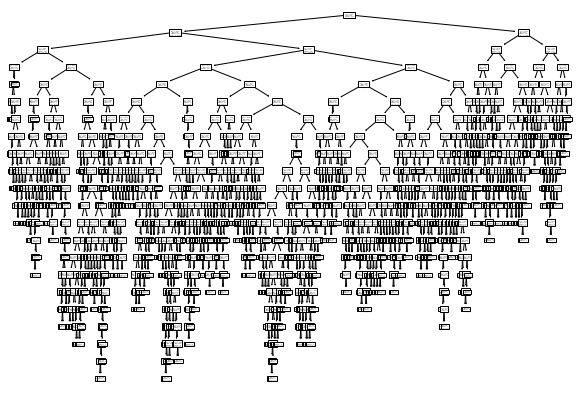

In [11]:
# 결정 트리 시각화
# plot_tree() 함수로 결정트리를 시각화 할 수 있음
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

- 위에서부터 아래로 거꾸로 자라나는 나무 모양
- 루트 노드(root node): 맨 위의 노드
- 리프 노드(leaf node): 맨 아래 노드
- 노드(node): 훈련 데이터의 특성에 대한 테스트 표현 (예) 현재 샘픙릐 당도가 -0.239보다 작거나 같은지 테스트
- 가지(branch): 테스트의 결과(True, False) 일반적으로 하나의 노드는 2개의 가지를 가짐
- 너무 복잡하니 트리의 깊이 제한해서 출력
- `max_depth` 매개변수: 루트 노드를 제외한 트리 깊이 지정
- `filled` 매개변수: 클래스에 맞게 노드 색 변경
- `featured_names` 매개변수: 특성 이름 전달
- 노드가 어떤 특성으로 나뉘는지 좀 더 쉽게 이해 가능

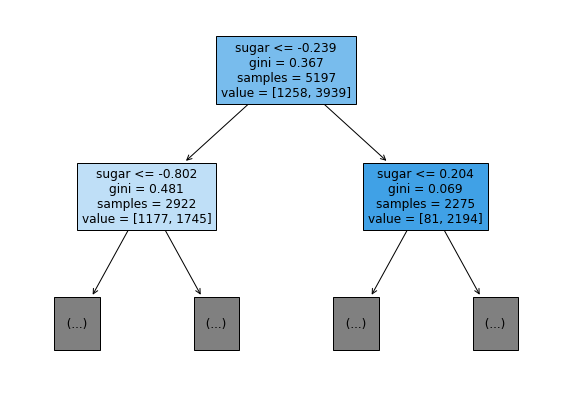

In [12]:
# 매개변수 지정
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()


# 결정 트리 설명
- 루트 노드는 당도가 -0.239 이하인지 질문
- Yes 이면 왼쪽 가지 / No는 오른쪽 가지
- smaples: 노드의 샘플 수(루트 노드의 샘플 수는 5,197개)
- values: 음성 클래스와(레드 와인), 양성 클래스(화이트 와인)
- 루트 노드에서 레드 와인(음성 클래스)는 1,258개, 화이트 와인(양성 클래스)는 3,989개
- gini(볼순도): 뒤에서 설명함

## 왼쪽 노드
- 당도가 더 낮은지 질문 (-0.802)
- 음성 1,177 / 양성 1,745
- 루트 노드보다 양성 클래스(화이트 와인) 비율이 크게 줄어들었음

## 오른쪽 노드
- 음성 클래스(레드 와인) 81, 양성 클래스(화이트 와인)가 2,194
- 대부분의 화이트 와인 샘플이 이 노드로 이동
- 노드의 배경 색깔 확인
- 루트 노드보다 오른쪽 노드가 더 진하고, 왼쪽 노드는 더 연함
- `filled=True` 지정하면 클래스마다 색깔 부여 + 어떤 클래스의 비율이 높아지면 점점 진한 색으로 표시

## 결정 트리에서의 예측
- 리프 노드에서 가장 많은 클래스 -> 예측 클래스
- 만약 오른쪽 결정 트리의 성장을 여기서 멈춘다면 왼쪽/오른쪽 노드 모두 양성 클래스로 예측됨
- 두 노드 모두 양성 클래스의 개수가 많기 때문


# 지니 불순도(Gini impurity)
- gini: DecisionTreeClassifier 클래스의 criterion 매개변수의 기본값
- creterion 매개변수
  - 루트 노드는 어떻게 당도 -0.239를 기준으로 왼쪽과 오른쪽 노드를 나누는가?
  - 바로 criterion 매개변수에 지정한 지니 불순도를 사용
  - 즉 지니 불순도란 노드에서 데이터를 분할할 기준을 정하는 변수
- 지니 불순도 = 1 - (음성 클래스 비율^2 + 양성 클래스 비율^2)
  - 예) 루트 노드 계산 = `1 - ((1258 / 5197)^2 + (3939/5197)^2) = 0.397`
- 노드의 두 클래스의 비율이 정확히 1/2 -> 불순도 0.5 -> 최악
- 노드에 하나의 클래스만 있다 -> 불순도 0 -> 순수 노드
- 결정 트리 모델은 부모 노드오 ㅏ자식 노드의 불순도 차이가 가능한 크도록 트리를 성장시킴


# 정보 이득(information gain)
- 부모 노드와 자식 노드의 불순도 차이 계산

  1. 자식 노드의 불순도를 샘플 개수에 비례하여 모두 더함
  2. 더한 결과를 부모 노드의 불순도에서 뺌

- 부모의 불순도 - (왼쪽 수 / 부모 수) * 왼쪽 불순도 - (오른쪽 수/ 부모 수) * 오른쪽 불순도
  - 예) 왼쪽 2,922개, 오른쪽 2,275개 샘플 이동
  - `0.367 - (2922/5197) * 0.481 - (2275/5197) * 0.069 = 0.066`

- 지니 불순도를 기준으로 정보 이득이 최대가 되도록 데이터 분리

# 결정트리 알고리즘
1. 불순도 기준을 사용해 정보 이득이 최대가 되도록 노드 분할
2. 새로운 샘플에 대해 예측할 때 노드의 질문에 따라 트리 이동
3. 마지막에 도달한 노드의 클래스 비율을 보고 예측
- 트리가 제한 없이 자란 경우 과대적합이 발생할 수 있음 이를 해결하기 위해 `가지치기`방법을 사용함

# 가지치기
- 열매를 잘 맺기 위해 과수원에서는 가지치기를 함
- 결정 트리도 가지치기가 필요!
- 그렇지 않으면 무작정 끝까지 자라나는 트리 생성
- 훈련세트에는 아주 잘 맞겠지만 테스트 세트에서 점수는 그에 못미침 -> 과대적합 -> 일반화가 잘 안됨
- 결정 트리에서 가지치기를 하는 가장 간단한 방법: 트리의 최대 깊이 지정
- `max_depth` 매개변수: 루트 노드 아래로 최대 n개의 노드까지만 성장

In [13]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 훈련 세트의 성능은 낮아졌지만 테스트 세트의 성능은 거의 그대로!

0.8454877814123533
0.8415384615384616


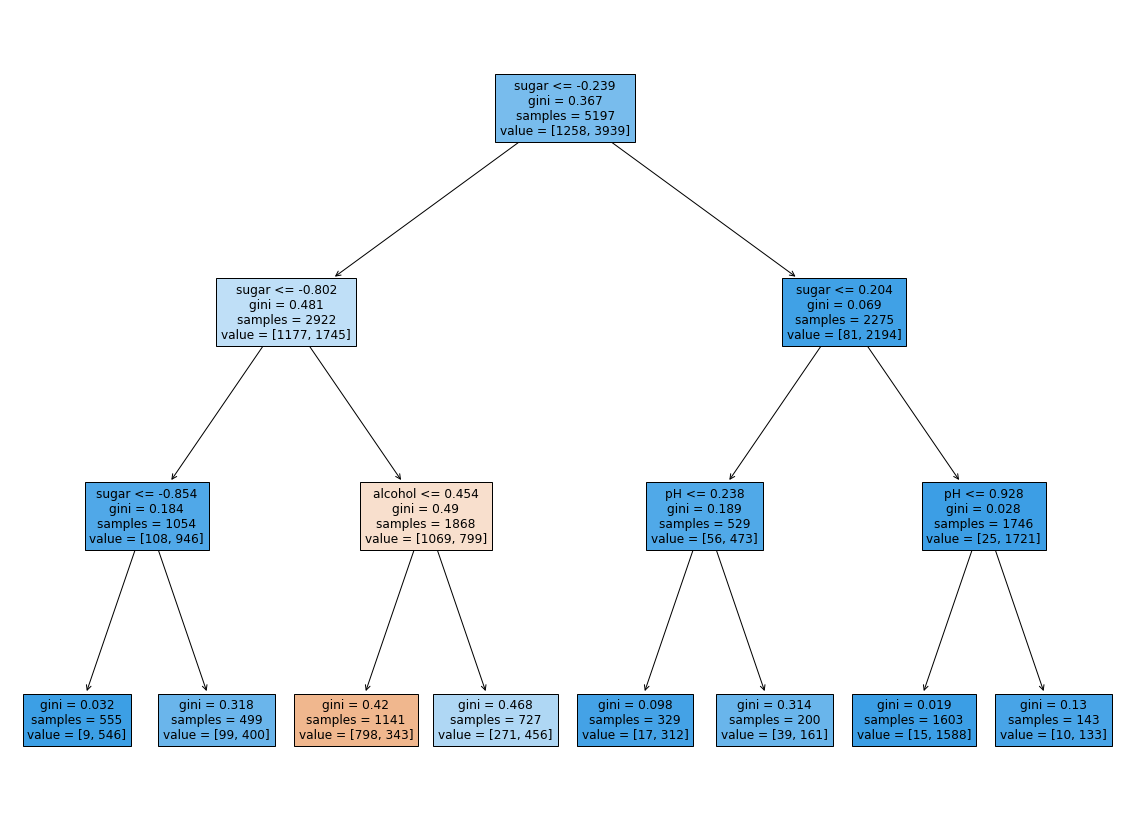

In [14]:
# 시각화
# 깊이 1: 모두 당도(sugar) 기준
# 깊이 2: 맨 왼쪽 노드만 당도 기준, 왼쪽 2번째: 알코올 도수 기준, 나머지 2: pH 기준
# 깊이 3: 최종 노드인 리프 노드 왼쪽에서 세번째 노드만 음성 클래스가 더 많음(레드 와인)
# 당도는 -0.239보다 작고 -0.802보다 크면서, 알코올 도수는 0.454보다 작아야 레드 와인
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

- 당도는 -0.239보다 작고 -0.802보다 크면서, 알코올 도수는 0.454보다 작아야 레드 와인
- 당도 -0.802를 어떻게 설명 가능?
- 불순도를 기준으로 샘플을 나눔 -> 불순도는 클래스별 비율 가지고 계산
- 특성값의 스케일은 결정 트리 알고리즘 계산에 아무런 영향을 미치지 않음
- 표준화 전처리를 할 필요가 없음! 매우 큰 장점

In [15]:
# 전처리 없이 다시 훈련
# 결정 트리는 표준화 전처리 과정이 필요 없음
# 전처리하기 전의 훈련 세트(train_input)와 테스트 세트(test_input)로 결정 트리 모델 다시 훈련
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
# 전처리 전과 전처리 후의 결과가 정확히 동일!

0.8454877814123533
0.8415384615384616


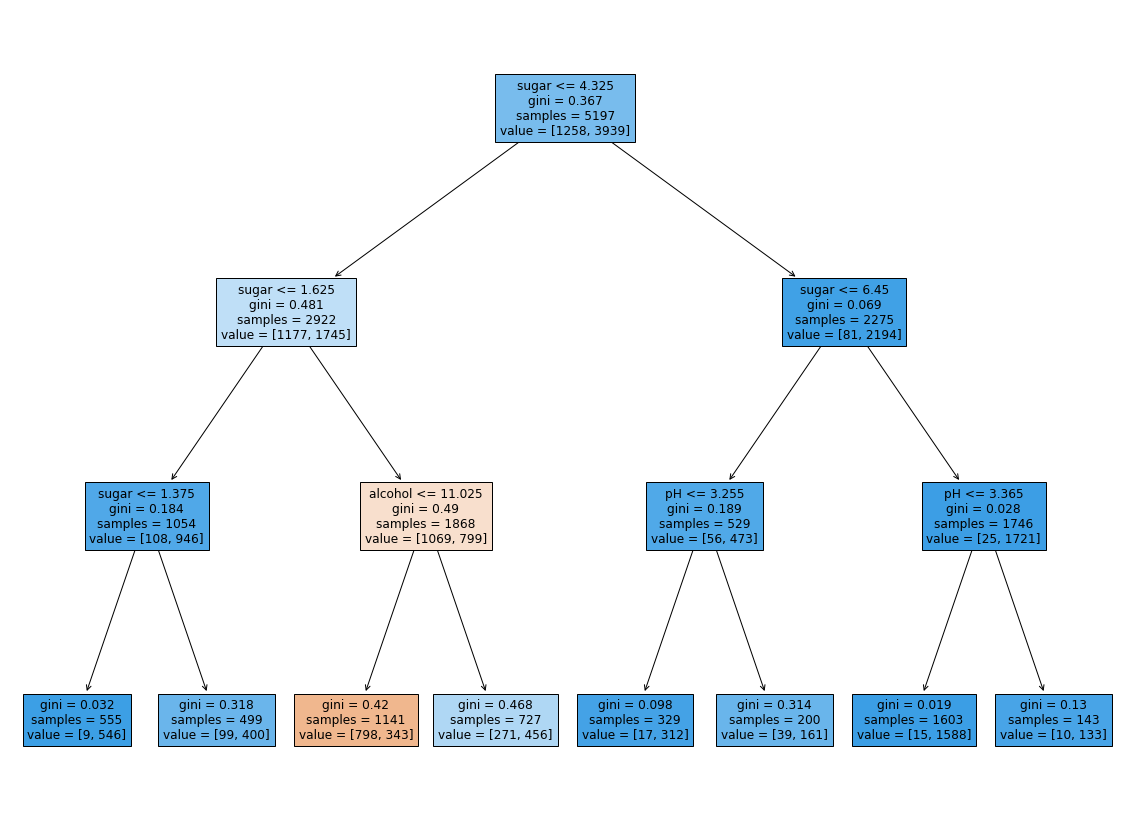

In [16]:
# 시각화 
# 결과를 보면 같은 트리지만 특성값을 표준점수로 바꾸지 않음 -> 이해 쉬움
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

# 특성 중요도
- 특성 즁요도: 어떤 특성이 가장 중요한지 알려줌
- 이 트리는 루트 노드와 깊이 1에서 당도를 사용했기 때문에 아마 당도가 가장 유용한 특성 중 하나일 것 같음
- `feature_importances_` 속성에 저장되어 있음


In [17]:
print(dt.feature_importances_)

[0.12345626 0.86862934 0.0079144 ]


- 역시 두 번째 특성인 당도가 0.87 정도로 특성 중요도가 가장 높음
- 세 값을 모두 더하면 1
- 각 노드의 정보 이득과 전체 샘플에 대한 비율을 곱한 후 특성별로 더하여 계산

# 좌우가 균일하지 않은 트리
- `max_depth` 매개변수로 가지치기 -> 좌우가 대칭인 트리 생성
- `min_impurity_decease` 매개변수로 가지치기 가능
- 어떤 노드의 정보 이득 * (노드 샘플 수) / (전체 샘플 수) 값이 해당 매개변수보다 작으면 더 이상 분할하지 않음 -> 좌우가 대칭이 되지 않을 가능성이 매우 높음

In [18]:
# 좌우가 균일하지 않은 트리
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))
# 테스트 성능이 높아짐!

0.8874350586877044
0.8615384615384616


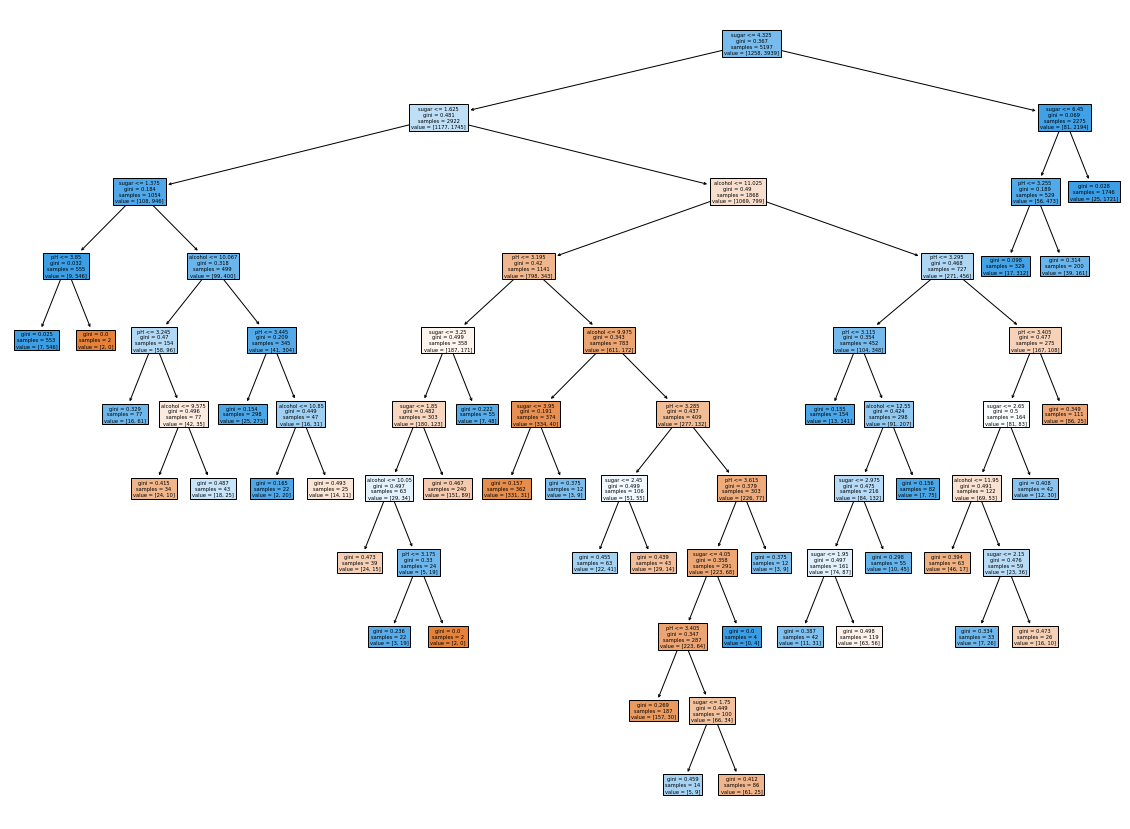

In [19]:
# 시각화
plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()